In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_deaths_US.csv')

In [3]:
counties = {
    'Bond': 'Illinois',
    'Calhoun': 'Illinois',
    'Clinton': 'Illinois',
    'Jersey': 'Illinois',
    'Macoupin': 'Illinois',
    'Madison': 'Illinois',
    'Monroe': 'Illinois',
    'St. Clair': 'Illinois',
    'Franklin': 'Missouri',
    'Jefferson': 'Missouri',
    'Lincoln': 'Missouri',
    'St. Charles': 'Missouri',
    'St. Louis City': 'Missouri',
    'St. Louis': 'Missouri',
    'Warren': 'Missouri'
}

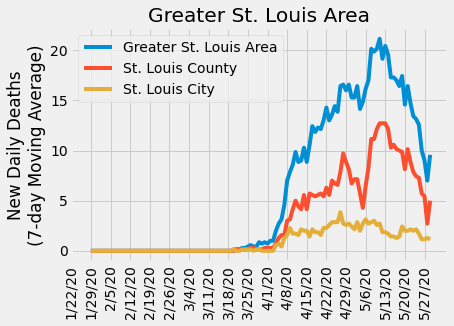

In [4]:
cond = ""
for k in counties.keys():
    cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
            %(counties[k], k)
cond = cond[:-1]
cols = df.columns[df.columns.str.contains('/20')]
df.query(cond).loc[:, cols]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)

y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Greater St. Louis Area')

cond = "(Province_State == 'Missouri')&(Admin2 == 'St. Louis')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis County')

cond = "(Province_State == 'Missouri')&(Admin2 == 'St. Louis City')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Deaths\n(7-day Moving Average)')
plt.title('Greater St. Louis Area')
plt.legend(loc='upper left')
plt.show()

## Missouri Statistical Areas

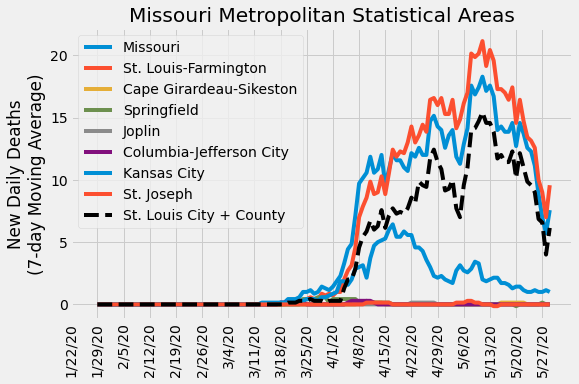

In [5]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Deaths\n(7-day Moving Average)')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()

## Confirmed Cases

In [6]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_confirmed_US.csv')

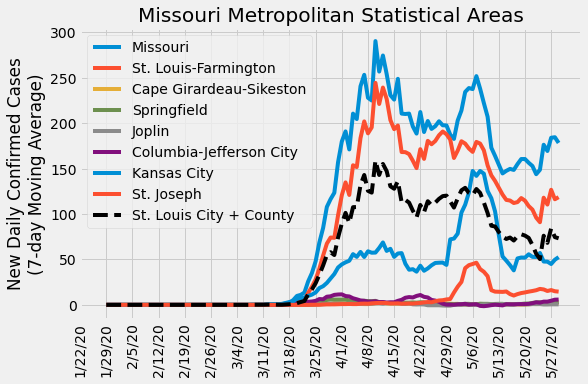

In [7]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Confirmed Cases\n(7-day Moving Average)')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()